<a href="https://colab.research.google.com/github/ManikckamR/CS620_HAR/blob/main/CS620_Project_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 620 - Project - Human Activity Recognition (HAR)
Name: Manikckam Rajendran & Upendranath Parol

Email: mraje001@odu.edu & uparo001@odu.edu

Web Portfolio: https://www.cs.odu.edu/~mrajendr/MyProfileWeb/ 
               https://upendranath.github.io/


---


            
              


## **Abstract**

**Human activity recognition** is to classify a person's actions from a series of measurements captured by sensors. Nowadays, collecting this type of data is not a hard task. With the growth of the Internet of Things, almost everyone has some gadget that monitors their movements. It can be a smartwatch, a pulsometer, or even a smartphone.

Usually, this is performed by following a fixed-length sliding window approach for the features extraction were two parameters have to be fixed: the size of the window and the shift. These are some of the data you could use:

    Body acceleration
    Gravity acceleration
    Body angular speed
    Body angular velocity

Smartphones are inbuilt with various sensors which includes Accelerometer and Gyroscope. Accelerometer measures acceleration while Gyroscope measures angular velocity.

The machine learning model can also be used for activity recognition is built on top of the devices' available sensors. However, due to the complexity of human activities and the existing differences between two individuals, analyzing this data can be a big challenge.

Objective of this project is to classify the human activity from a series of measurements data captured by accelerometer and gyroscope sensors of Smartphone. We have chosen to implement our solution on mobile phones because they are ubiquitous and do not require the subjects to carry additional sensors that might impede their activities. We evaluate the solution against two datasets (an internal one collected by us and an external one) with great effect. Results show good accuracy for recognizing all below six activities, with especially good results obtained for walking, running, sitting, and standing.

Our end goal is monitor all the activities of a person such as calories burning, sleeping hours and also Heart-Rate data using Accelerometer and Gyroscope. Since we only have Smartphone data so just by using Accelerometer and Gyroscope data we will monitor the all activity of a person. This software can then be converted into an App which can be downloaded in Smartphone. Hence, a person who has Smartphone can monitor his/her health using this App.

## Problem Statement
We will solve a multi classification problem by leveraging 561 human engineered feature data and predit one of the six activities that smaprthphone user is performing at that 2.56 seconds time window.All of the Accelerometer and Gyroscope are tri-axial, which means have total six time series data to predict **Walking** or **Walking-Upstairs** or **Walking-Downstairs** or **Lying-Down** or **Standing-Up** or **Sitting-Down**. The approach would be to apply all classical machine learning models on these 561 sized domain expert engineered feaures and predict accuracy of the model.


##**DataSource**

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones



###**Description of DataSet**

The data set that we are using is a collection of accelerometer and Gyroscope data taken from a Smartphone that various people carried with them while conducting six different exercises (Downstairs, Lying, Sitting, Standing, Upstairs, Walking). For each exercise the acceleration for the x, y, and z axis was measured and captured with a timestamp and person ID. Activities are encoded as follows

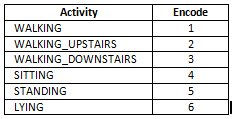

* Readings are divided into a window of 2.56 seconds with 50% overlapping.

* Accelerometer readings are divided into gravity acceleration and body acceleration readings, which has x, y and z components each.

* Gyroscope readings are the measure of angular velocities which has x, y and z components.

* Jerk signals are calculated for Body-Acceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, energy-bands, entropy etc., are calculated for each window.

* Extra features are calculated by taking the average of signals in a single window sample. These are used on the angle() variable.

* Finally, we got feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a data-point of 561 features.


All the data is present in 'UCI_HAR_dataset/' folder in present working directory.

**Feature names**

  'UCI_HAR_dataset/features.txt'

**Train Data**

  'UCI_HAR_dataset/train/X_train.txt'

  'UCI_HAR_dataset/train/subject_train.txt'

  'UCI_HAR_dataset/train/y_train.txt'

**Test Data**

  'UCI_HAR_dataset/test/X_test.txt'

  'UCI_HAR_dataset/test/subject_test.txt'

  'UCI_HAR_dataset/test/y_test.txt'

In [ ]:
import pandas as pd

features_data = 'https://raw.githubusercontent.com/UpendraNath/CS620_Project_HAR/develop/UCI%20HAR%20Dataset/UCI%20HAR%20Dataset/features.txt'
data = pd.read_csv(features_data,delim_whitespace = True,header = None)
data.head(5)

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


**Reading Train DataSet**



In [ ]:
X_train_data = 'https://raw.githubusercontent.com/UpendraNath/CS620_Project_HAR/develop/UCI%20HAR%20Dataset/UCI%20HAR%20Dataset/train/X_train.txt'
data_train = pd.read_csv(X_train_data,delim_whitespace = True,header = None)
data_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869,-0.986093,-0.999976,-0.999736,-0.999504,-0.997180,-0.983799,-0.986007,-0.627446,-0.850930,-0.911872,0.061436,0.074840,0.198204,-0.264307,0.072545,-0.155320,0.323154,-0.170813,0.294938,-0.306081,0.482148,-0.470129,-0.305693,-0.362654,0.507459,...,-0.999895,-0.988055,-1.0,1.000000,0.678921,-0.701131,-0.909639,-0.989413,-0.987836,-0.986850,-0.986749,-0.996199,-0.989413,-0.999876,-0.989136,-0.720891,-1.000000,-0.035684,-0.230091,-0.511217,-0.995221,-0.995237,-0.995722,-0.995273,-0.995732,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,0.683250,0.837869,-0.992653,-0.999991,-0.999856,-0.999757,-0.998004,-0.981232,-0.991325,-0.786553,-0.559477,-0.761434,0.313276,-0.131208,0.191161,0.086904,0.257615,-0.272505,0.434728,-0.315375,0.439744,-0.269069,0.179414,-0.088952,-0.155804,-0.189763,0.599213,...,-0.999941,-0.994169,-1.0,-1.000000,0.559058,-0.528901,-0.858933,-0.991433,-0.989059,-0.987744,-0.991462,-0.998353,-0.991433,-0.999902,-0.989321,-0.763372,-0.897436,-0.273582,-0.510282,-0.830702,-

In [ ]:
print("Size of Train X data = {}".format(data_train.shape))

Size of Train data = (7352, 561)


In [ ]:
Y_train_data = 'https://raw.githubusercontent.com/UpendraNath/CS620_Project_HAR/develop/UCI%20HAR%20Dataset/UCI%20HAR%20Dataset/train/y_train.txt'
Label_train = pd.read_csv(Y_train_data,delim_whitespace = True,header = None)
Label_train.head(5)

,0
0,5
1,5
2,5
3,5
4,5


In [ ]:
print("Size of Train Label data = {}".format(Label_train.shape))

Size of Train Label data = (7352, 1)


In [ ]:
Sub_train_data = 'https://raw.githubusercontent.com/UpendraNath/CS620_Project_HAR/develop/UCI%20HAR%20Dataset/UCI%20HAR%20Dataset/train/subject_train.txt'
Subject_id = pd.read_csv(Sub_train_data,delim_whitespace = True,header = None)
Subject_id.head(5)

,0
0,1
1,1
2,1
3,1
4,1


In [ ]:
print("Size of Subject who performed actvity= {}".format(Subject_id.shape))

Size of Subject who performed actvity= (7352, 1)


In [9]:
import pandas as pd
from pandas import read_csv
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
data = load_file('https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/train/Inertial%20Signals/body_acc_y_train.txt')
print(data.shape) 

(7352, 128)


In [11]:
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

In [17]:
from numpy import dstack
from pandas import read_csv
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/train/Inertial%20Signals/')
print(total_acc.shape)

(7352, 128, 3)


In [27]:
# load dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial%20Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load all train
trainX, trainy = load_dataset('train', 'https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/')
print(trainX.shape, trainy.shape) 
# load all test
testX, testy = load_dataset('test', 'https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/')
print(testX.shape, testy.shape)

HTTPError: ignored

## Estimated Project Plan

  



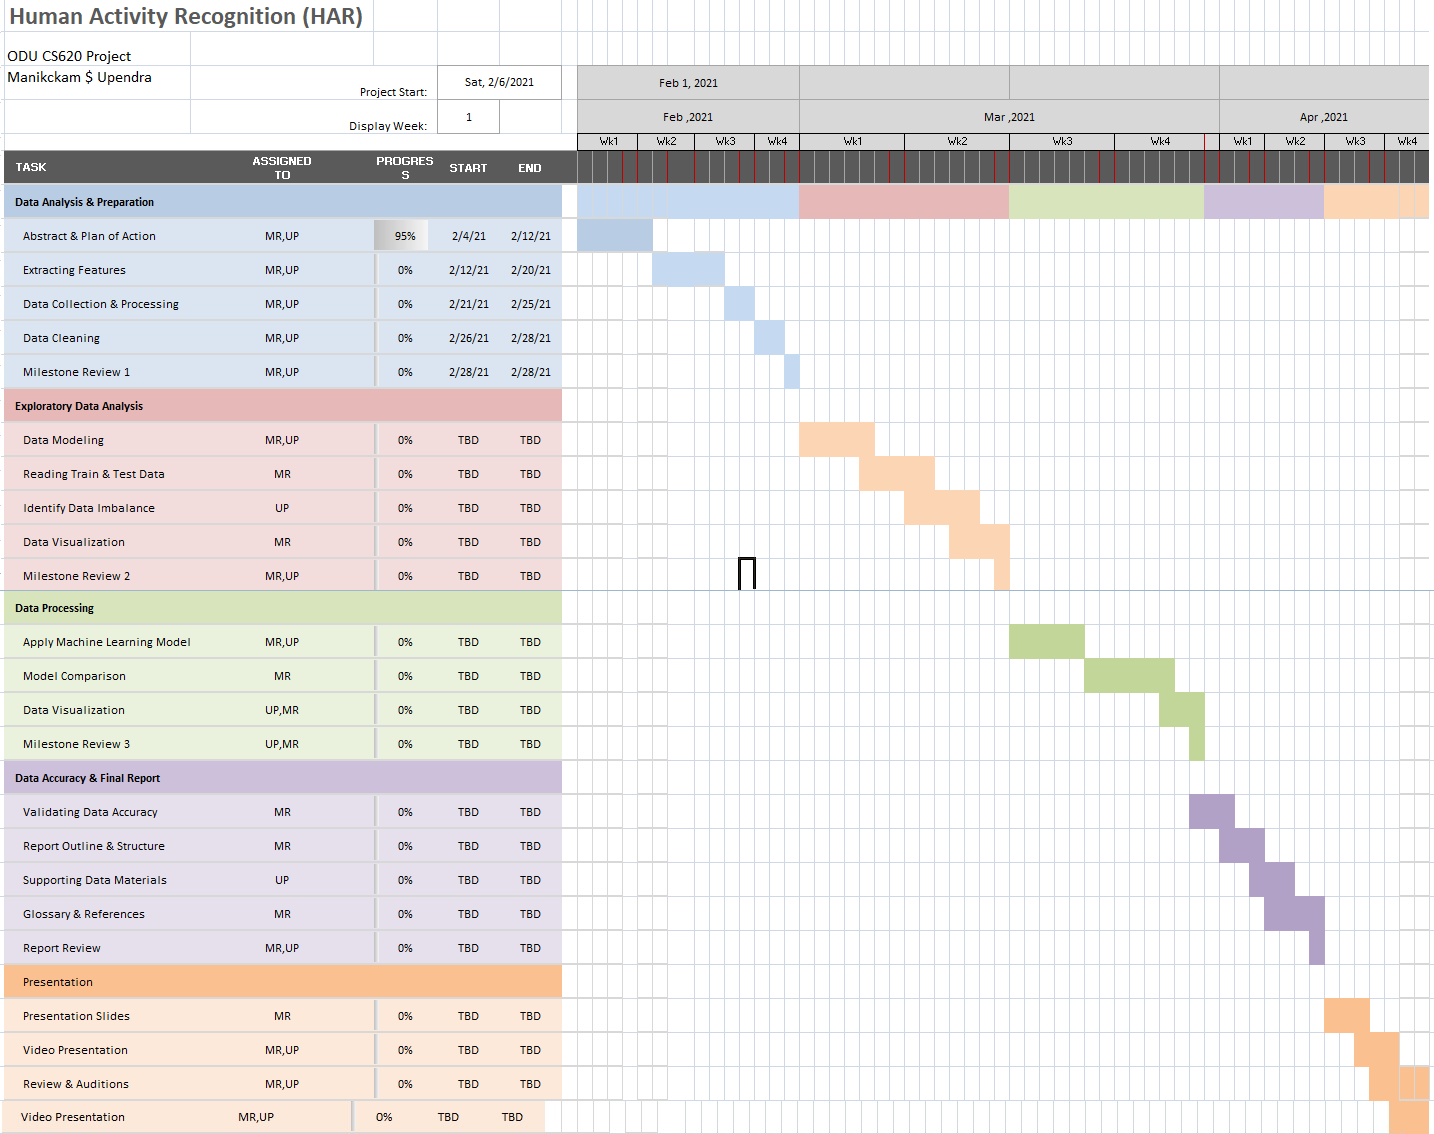

##**Milestone Review 1** (Progress Check 1)

---

This review process will report the project progress data preparation, which included collection, processing, cleaning and design decisions. 

###**Design Decisions**

> **Target Audience:** 
>>*Common-man with smartphones* : One of our main objective of project is t to use our project features by every single common-man across the world, in addition to Smartphones, we are also using Smart-Watches like Fitbit or Apple-Watch, which help us to track our health. They monitor our each activity throughout the day check how many calories we have burnt. How many hours have we slept. However, in addition to Accelerometer and Gyroscope, they also use Heart-Rate data to monitor our activity. Since, we only have Smartphone data so just by using Accelerometer and Gyroscope data we will monitor the activity of a person. This software can then be converted into an App which can be downloaded in Smartphone. Hence, a person who has Smartphone can monitor his/her health using this App

>> **Elderly people** : Our objective to serve elderly people especially because Number of elderly people is predicted to increase quickly in the upcoming years, “aging in place” (which refers to living at home regardless of age and other factors) is becoming an important topic in the area of ambient assisted living. With our design, we target Walking or Walking-Upstairs or Walking-Downstairs or Lying-Down or Standing-Up or Sitting-Down. We evaluate the solution against two datasets (an internal one collected by us and an external one) with great effect. Results show good accuracy for recognizing all six activities, with especially good results obtained for walking, running, sitting, and standing.

>>**Medical research** : Our design support health data collection, so data can be used for any Medical research

>> **Human survey system** : This system have sensor signals are pre-processed by applying noise filters and then sampled in fixed-width windows(sliding windows). We have multiple dataset to derive our patterns so these data can be confidentially used in human survey system.

> ***Tools & Technologies*** : 
>> ***Pyton*** : Python Data Visualization Libraries for various data visualization like matplotlib, Bokeh, Plotly etc.,

>>***Weka*** - An open source machine learning software. It provides a collection of visualization tools and algorithms for data analysis and predictive modeling.

>> CSV Files 


## Status Update

>**Current Status**
>>Our primary goals at this stage of the project were to experiment out with a group of few volunteers within an age bracket of 19-48 years. Each person performes six activities (WALKING, WALKING-UPSTAIRS, WALKING-DOWNSTAIRS, SITTING-DOWN, STANDING-UP, LAYING-DOWN) wearing a smartphone (any android smart phone) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments to  collect all of our  data into single file; to clean and format the dataset; and to begin importing the data into Weka for the next stage of the project. All of our data was successfully combined into a single CSV file. Several changes have been completed, but additional formatting changes and data removal may still necessary. 

>**Goals**
>* Gather all the experimented data and Combine files into a single CSV file.
>* Review what changes should be made to the formatting of the data set.
>* We will apply classical Machine Learning models on these 561 sized   domain expert engineered features.
>* As we know that LSTM works well on time-series data, so we have decided that we will apply LSTM of Recurrent Neural Networks on 128 sized raw readings that we obtained from accelerometer and gyroscope signals.
>* Assess what changes may need to implemented with Python commands.
>* Implement the desired formatting changes.
>* Begin importing the dataset into Weka.

>**Inprogress Tasks**
>* We are progressing to collect data from our experiment with different ages and data was only available in csv format according to six activities namely Walking or Walking-Upstairs or Walking-Downstairs or Lying-Down or Standing-Up or Sitting-Down.
>* Reading Train data and reading test data, basically the train data in the txt format which will have mapping activity to activity name and labels >* Successfully completed activity mappings 
>* Working on preparing data files (using Python) and into a single CSV file, which will be the primary dataset for the project.
>* Began cleaning data by removing superfluous entries from the dataset and changing the format of the data. A comprehensive overview of these changes is available below in the *Dataset Updates* section.

>**Data-Points Distribution and Data Updates**
>* Experimented test-subjects data will be randomly split to 70%(21) train and 30%(7) test data.
>* Each data-point corresponds one of the 6 Activities.
>* Normalized the Data points from different activities.
>* Normalized the database fields.
>* Reading train data from first dataset which will be 5 rows × 564 columns and identified the size of the train data. The following cleanups and changes were made to the primary dataset:
>* Removed NULL values for both train data and test data
>* Removed duplicate values both train data and test data 
>* Found 0 records on duplicates and NULL values
>* Validated imbalance in data 

**Initial Code**

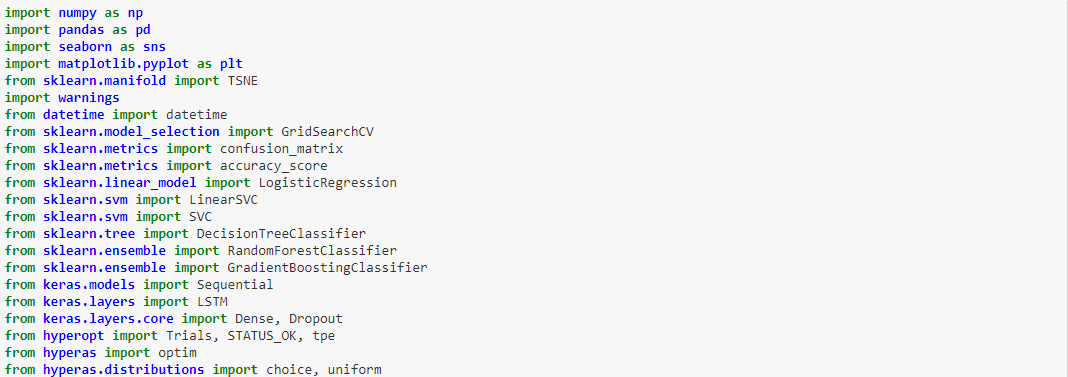

**Reading Train Data**
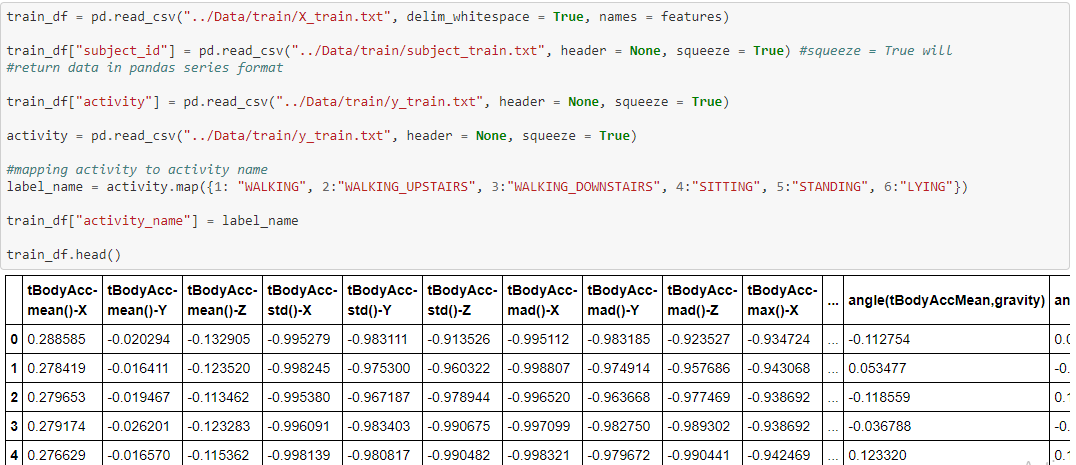

## Balance of Activity Classes

>A good first check of the data is to investigate the balance of each activity.

>We believe that each of the 30 subjects performed each of the six activities.

>Confirming this expectation will both check that the data is indeed balanced, making it easier to model, and confirm that we are correctly loading and interpreting the dataset.

>We can develop a function that summarizes the breakdown of the output variables, e.g. the y variable.

>The function class_breakdown() below implements this behavior, first wrapping the provided NumPy array in a DataFrame, grouping the rows by the class value, and calculating the size of each group (number of rows). The results are then summarized, including the count and the percentage.

>Running the example first summarizes the breakdown for the training set. We can see a pretty similar distribution of each class hovering between 13% and 19% of the dataset.

>The result on the test set and on both datasets together look very similar.

>It is likely safe to work with the dataset assuming the distribution of classes is balanced per train and test set and perhaps per subject.

In [29]:
# summarize class balance
from numpy import array
from numpy import vstack
from pandas import read_csv
from pandas import DataFrame

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# summarize the balance of classes in an output variable column
def class_breakdown(data):
	# convert the numpy array into a dataframe
	df = DataFrame(data)
	# group data by the class value and calculate the number of rows
	counts = df.groupby(0).size()
	# retrieve raw rows
	counts = counts.values
	# summarize
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

# load train file
trainy = load_file('https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/train/y_train.txt')
# summarize class breakdown
print('Train Dataset')
class_breakdown(trainy)

# load test file
testy = load_file('https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/test/y_test.txt')
# summarize class breakdown
print('Test Dataset')
class_breakdown(testy)

# summarize combined class breakdown
print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


##Plot Time Series Data for One Subject

>We are working with time series data, therefore an import check is to create a line plot of the raw data.

>The raw data is comprised of windows of time series data per variable, and the windows do have a 50% overlap. This suggests we may see some repetition in the observations as a line plot unless the overlap is removed.

>We can start off by loading the training dataset using the functions developed above.

>Next, we can load the ‘subject_train.txt‘ in the ‘train‘ directory that provides a mapping of rows to the subject to which it belongs.

>We can load this file using the load_file() function. Once loaded, we can also use the unique() NumPy function to retrieve a list of the unique subjects in the training dataset.

>Next, we need a way to retrieve all of the rows for a single subject, e.g. subject number 1.

>We can do this by finding all of the row numbers that belong to a given subject and use those row numbers to select the samples from the loaded X and y data from the training dataset.

>The data_for_subject() function below implements this behavior. It will take the loaded training data, the loaded mapping of row number to subjects, and the subject identification number for the subject that we are interested in, and will return the X and y data for only that subject.

Get all data for one subject<br>
>>def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

>Now that we have data for one subject, we can plot it.

>The data is comprised of windows with overlap. We can write a function to remove this overlap and squash the windows down for a given variable into one long sequence that can be plotted directly as a line plot.

>The to_series() function below implements this behavior for a given variable, e.g. array of windows.

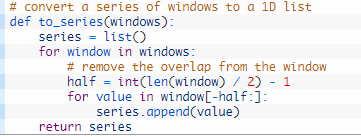

>Finally, we have enough to plot the data. We can plot each of the nine variables for the subject in turn and a final plot for the activity level.

>Each series will have the same number of time steps (length of x-axis), therefore, it may be useful to create a subplot for each variable and align all plots vertically so we can compare the movement on each variable.

>The plot_subject() function below implements this behavior for the X and y data for a single subject. The function assumes the same order of the variables (3rd axis) as was loaded in the load_dataset() function. A crude title is also added to each plot so we don’t get easily confused about what we are looking at.

>In the plot, we can see periods of large movement corresponding with activities 1, 2, and 3: the walking activities. We can also see much less activity (i.e. a relatively straight line) for higher numbered activities, 4, 5, and 6 (sitting, standing, and laying).

>This is good confirmation that we have correctly loaded interpreted the raw dataset.

>We can see that this subject has performed the same general sequence of activities twice, and some activities are performed more than two times. This suggests that for a given subject, we should not make assumptions about what activities may have been performed or their order.

>We can also see some relatively large movement for some stationary activities, such as laying. It is possible that these are outliers or related to activity transitions. It may be possible to smooth or remove these observations as outliers.

>Finally, we see a lot of commonality across the nine variables. It is very likely that only a subset of these traces are required to develop a predictive model.

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


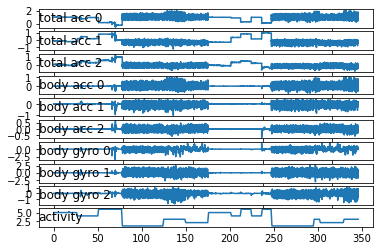

In [31]:
# plot all vars for one subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial%20Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]
 
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series
 
# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()
 
# load data
trainX, trainy = load_dataset('train', 'https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/')
# load mapping of rows to subjects
sub_map = load_file('https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

>>Running the example prints the unique subjects in the training dataset, the sample of the data for the first subject, and creates one figure with 10 plots, one for each of the nine input variables and the output class.


>>We can re-run the example for another subject by making one small change, e.g. choose the identifier of the second subject in the training dataset.

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(341, 128, 9) (341, 1)


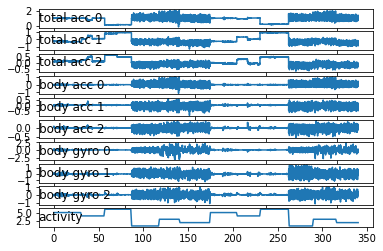

In [34]:
# plot all vars for one subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial%20Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]
 
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series
 
# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()
 
# load data
trainX, trainy = load_dataset('train', 'https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/')
# load mapping of rows to subjects
sub_map = load_file('https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[1]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

Plot Histograms Per Subject

>As the problem is framed, we are interested in using the movement data from some subjects to predict activities from the movement of other subjects.

>This suggests that there must be regularity in the movement data across subjects. We know that the data has been scaled between -1 and 1, presumably per subject, suggesting that the amplitude of the detected movements will be similar.

>We would also expect that the distribution of movement data would be similar across subjects, given that they performed the same actions.

>We can check for this by plotting and comparing the histograms of the movement data across subjects. A useful approach would be to create one plot per subject and plot all three axis of a given data (e.g. total acceleration), then repeat this for multiple subjects. The plots can be modified to use the same axis and aligned horizontally so that the distributions for each variable across subjects can be compared.

>The plot_subject_histograms() function below implements this behavior. The function takes the loaded dataset and mapping of rows to subjects as well as a maximum number of subjects to plot, fixed at 10 by default.

>A plot is created for each subject and the three variables for one data type are plotted as histograms with 100 bins, to help to make the distribution obvious. Each plot shares the same axis, which is fixed at the bounds of -1 and 1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


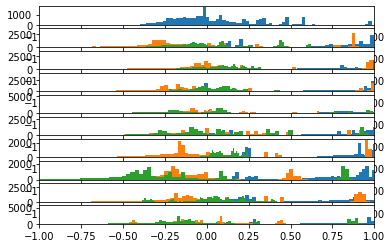

In [35]:
# plot histograms for multiple subjects
from numpy import array
from numpy import unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial%20Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]
 
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series
 
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# total acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,i]), bins=100)
	pyplot.show()
 
# load training dataset
X, y = load_dataset('train', 'https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/')
# load mapping of rows to subjects
sub_map = load_file('https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/train/subject_train.txt')
# plot histograms for subjects
plot_subject_histograms(X, y, sub_map)

>We can update the plot_subject_histograms() function to next plot the distributions of the body acceleration.

>Running the updated example creates the same plot with very different results.

>Here we can see all data clustered around 0.0 across axis within a subject and across subjects. This suggests that perhaps the data was centered (zero mean). This strong consistency across subjects may aid in modeling, and may suggest that the differences across subjects in the total acceleration data may not be as helpful.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


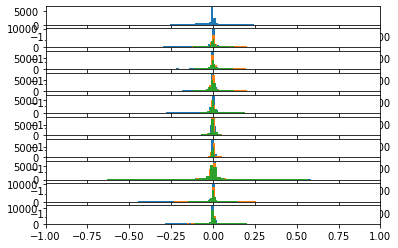

In [36]:
# plot histograms for multiple subjects
from numpy import array
from numpy import unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial%20Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]
 
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series
 
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# body acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,3+i]), bins=100)
	pyplot.show()
 
# load training dataset
X, y = load_dataset('train', 'https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/')
# load mapping of rows to subjects
sub_map = load_file('https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/train/subject_train.txt')
# plot histograms for subjects
plot_subject_histograms(X, y, sub_map)

>Finally, we can generate one final plot for the gyroscopic data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


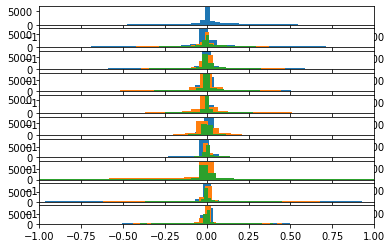

In [37]:
# plot histograms for multiple subjects
from numpy import array
from numpy import unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial%20Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]
 
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series
 
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# body acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,6+i]), bins=100)
	pyplot.show()
 
# load training dataset
X, y = load_dataset('train', 'https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/')
# load mapping of rows to subjects
sub_map = load_file('https://raw.githubusercontent.com/ManikckamR/CS620_HAR/main/train/subject_train.txt')
# plot histograms for subjects
plot_subject_histograms(X, y, sub_map)